In [5]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import mongoconn as con
from textblob import TextBlob
from numpy import asarray as asarray
import matplotlib.pyplot as plt
import sentanalyzer as sent 
import seaborn as sns; sns.set()

In [3]:
vector = sent.sentiment()

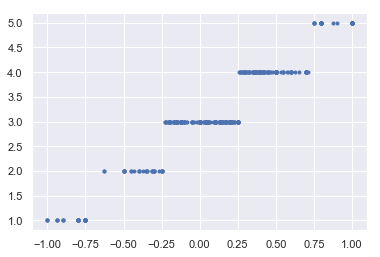

In [6]:
plt.plot(vector[:,0],vector[:,1],'.')

In [35]:
tweets = con.search_field(field ='text',collection='tweets',db_name='tweets')

In [36]:
analyzer = SentimentIntensityAnalyzer()

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [37]:
tweet1 = tweets[0]

In [38]:
tweet1

{'text': 'RT @PeterLBrandt: #silver and #gold forming possible bear pennants in their dive into the dredges. $SLV $SI_F $GLD $GC_F  I know, I know ..…'}

In [39]:
translate = TextBlob(tweet1['text'])

In [40]:
tweet1.keys()

dict_keys(['text'])

In [41]:
lista = []

for tweet in tweets:
    try:
        polaridad = TextBlob(tweet['text']).polarity
        
        if polaridad >= 0.75:
            lista.append((polaridad,5))
        elif polaridad >.25 and polaridad <.75:
            lista.append((polaridad,4))
        elif polaridad > -.25 and polaridad <= 0.25:
            lista.append((polaridad,3))
        elif polaridad > -.75 and polaridad < 0.25:
            lista.append((polaridad,2))
        else:
            lista.append((polaridad,1))
    except:
        pass

In [43]:
sentimiento= asarray(lista)

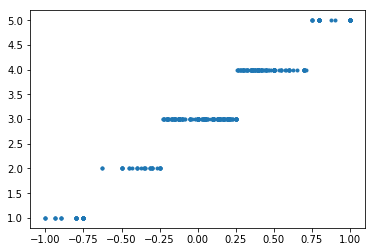

In [44]:
plt.plot(sentimiento[:,0],sentimiento[:,1],'.')